# **Project 2: Healthcare Stock Portfolio Allocation Project**

* *Group 5: Ce Zhuang, Shuyao Chen, Simeng Deng, Yingxiao Zhu, Zihao Yan*

* Professor: Dr. Dave Wanik

## **1. Data Prep and EDA**

### EDA:S&P Sectors - Health Care

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Read data from Excel file
from google.colab import files
# Command to upload file
uploaded = files.upload()

In [ ]:
# Transform excel file in a pandas dataframe
df = pd.read_excel('Stock lists.xlsx') 
df.head()

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Time,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,"Market Cap, $K",P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,INCY,Incyte Corp,86.64,-0.38,-0.0044,86.55,86.84,83.44,1105300,10/30/20,32% Sell,0.4391,0.3719,975185,62.48,110.36,0.2,-0.0078,-0.0345,-0.1380,0.0356,18948082,0.00,-0.89,446.91 M,1.08,0.00,0.0000
1,MYL,Mylan NV Ord Shs,14.54,0.17,0.0118,14.38,14.89,14.34,9155600,10/30/20,100% Sell,0.4253,0.3458,4258645,12.75,23.11,-26.4,-0.2766,-0.0196,-0.1096,-0.2509,7516410,3.14,4.58,16.80 M,1.46,0.00,0.0000
2,BIIB,Biogen Inc,252.07,6.59,0.0268,247.26,252.21,243.73,1413700,10/30/20,100% Sell,0.3702,0.3020,1068515,243.25,374.99,-22.7,-0.1505,-0.1114,-0.0829,-0.1595,38789036,6.71,36.58,"5,888.50 M",0.54,0.00,0.0000
3,CVS,CVS Corp,56.09,0.16,0.0029,55.93,56.31,55.40,8665500,10/30/20,100% Sell,0.3880,0.2261,6740335,52.04,77.03,-19.6,-0.2450,-0.0396,-0.1236,-0.1635,73405152,6.89,8.12,"6,634.00 M",0.68,2.00,0.0357
4,CAH,Cardinal Health,45.79,0.18,0.0039,45.49,46.26,45.15,4173800,10/30/20,100% Sell,0.4078,0.2545,1732180,39.05,60.69,-13.5,-0.0947,-0.0247,-0.1893,-0.0871,13434512,8.37,5.45,"-3,696.00 M",0.94,1.94,0.0424


#### 1. EPS

X - axis: stock name

Y - axis: the number of EPS

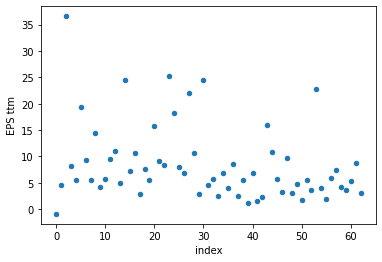

In [ ]:
df.reset_index().plot(kind='scatter', x='index', y='EPS ttm')
plt.show()



*   Many of stocks stay have EPS between 0 - 10
*   The number of stocks become less from high EPS to low EPS



In [ ]:
# print 10 stocks with the top ten EPS ttm 
df.nlargest(10,['EPS ttm'])

,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Time,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,"Market Cap, $K",P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
2,BIIB,Biogen Inc,252.07,6.59,0.0268,247.26,252.21,243.73,1413700,10/30/20,100% Sell,0.3702,0.3020,1068515,243.25,374.99,-22.7,-0.1505,-0.1114,-0.0829,-0.1595,38789036,6.71,36.58,"5,888.50 M",0.54,0.00,0.0000
23,HUM,Humana Inc,399.28,2.53,0.0064,398.22,402.12,392.49,942800,10/30/20,40% Buy,0.4210,0.3162,556370,208.25,449.43,30.3,0.0894,-0.0353,0.0019,0.3572,52821940,15.70,25.27,"2,707.00 M",0.88,2.50,0.0063
30,REGN,Regeneron Pharmaceuticals,543.56,-12.23,-0.0220,545.12,556.58,533.23,1165500,10/30/20,40% Sell,0.3995,0.3737,1157850,303.49,664.64,53.5,0.4476,-0.0290,-0.1392,0.7478,57830432,22.61,24.58,"2,115.80 M",0.51,0.00,0.0000
14,ANTM,Anthem Inc,272.80,-0.46,-0.0017,273.92,275.03,269.01,1567700,10/30/20,48% Buy,0.4454,0.3561,1112285,171.03,311.75,11.8,-0.0968,0.0157,-0.0158,-0.0024,67846448,11.50,24.43,"4,807.00 M",0.92,3.80,0.0139
53,MTD,Mettler-Toledo International,997.91,-5.88,-0.0059,995.86,1007.16,985.05,91200,10/30/20,80% Buy,0.4955,0.2344,91375,579.40,1078.98,44.1,0.2580,0.0333,0.1148,0.4085,23857024,43.95,22.84,561.11 M,1.03,0.00,0.0000
27,ALGN,Align Technology,426.08,-10.49,-0.0240,432.00,435.90,417.36,767400,10/30/20,100% Buy,0.6673,1.0785,959765,127.88,475.37,61.3,0.5269,0.3016,0.4388,0.6860,33569564,19.86,21.98,442.78 M,1.85,0.00,0.0000
5,CI,Cigna Corp,166.97,3.57,0.0218,163.46,167.51,163.22,2014400,10/30/20,88% Sell,0.4458,0.3730,1658830,118.50,224.64,-10.3,-0.1835,-0.0144,-0.0644,-0.0537,61311552,8.44,19.35,"5,104.00 M",0.67,0.04,0.0002
24,UNH,Unitedhealth Group Inc,305.14,1.46,0.0048,303.23,307.17,299.60,3557300,10/30/20,40% Buy,0.4343,0.2703,2642420,187.72,335.65,23.6,0.0380,-0.0213,-0.0003,0.1976,289985536,16.64,18.25,"13,839.00 M",0.68,5.00,0.0164
43,TMO,Thermo Fisher Scientific Inc,473.12,1.24,0.0026,469.06,475.47,465.50,1251800,10/30/20,100% Buy,0.6031,0.2266,1201130,250.21,490.71,64.1,0.4563,0.0716,0.1524,0.5673,187161056,29.47,16.01,"3,696.00 M",0.98,0.88,0.0019
20,AMGN,Amgen Inc,216.94,-0.88,-0.0040,216.22,217.27,213.96,3262700,10/30/20,40% Sell,0.3409,0.3337,2712110,177.05,264.97,-5.1,-0.1001,-0.1464,-0.1186,0.0287,127060448,13.26,15.72,"7,842.00 M",0.81,6.40,0.0295


#### 2. EPS vs. 3M% Chg

X - axis: EPS

Y - axis: change rate for 3 month

In [ ]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(df, x='EPS ttm', y='3M %Chg', color="Name")
fig.show()



*   Many of stocks have low EPS and low change of stocks.
*   The change and EPS of stocks are slightly different from each others. Aligh Technology has highest change and Biogen Inc has the highest EPS



#### 3. P/E vs. 3M% Chg

X - axis: P/E

Y - axis: change rate for 3 month

In [ ]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(df, x='P/E ttm', y='3M %Chg', size='Market Cap, $K', color="Name")
fig.show()

* High growth company has high P/E. P/E can be explained by the growth potential for a stock. The bigger scale for a company capital, the lower P/E of the stock. The more promising for a company, such as technological company, the higher P/E. The bottom left stock are tend to be traditional healthcare company, such as CVS Corp, Cigna Corp. The top right company tend to be biomedical science company, such as Idexx Laboratories. 

* The bigger the bubble, the bigger market capital of that company. We can see the leading enterprise like Johnson % Johnson, Unitedhealth Group Inc have P/E around 17. But the 3 months change are lower than 0. 

#### 4. Market Cap vs. 3M%Chg

X - axis: Market Cap

Y - axis: change rate for 3 month

In [ ]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(df, x='Market Cap, $K', y='3M %Chg', color="Name")
fig.show()

*   Company that has a larger market capital tend to have a more stable percentage change for the last 3 months.
*   Companies that have sizes of market capital less than $100 billion are more volatile than those have larger sizes of market capital. The percentage change ranges from -30% to 40%.


####5. Market Cap vs. P/E

X - axis: Market Cap

Y - axis: P/E


In [ ]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(df, x='Market Cap, $K', y='P/E ttm', color="Name")
fig.show()


*   Most companies' market cap in health care field are less than $100 billion. Only 13 companies have market cap over 100 billion dollars.  
*   Company with higher market cap tend to have P/E ratio lower than 20. Large cap companies normally have long history and are typically more statble. Investors have a relatively clear understanding of the company , so these stocks are less possible to be overestimated or regarded as high potential, which shown as a lower P/E ratio.   



## **2. Stocks Selection**

Based on EDA, we list 10 optimal stocks for each chart. 

Unitedhealth Group Inc

Humana Inc

Cooper Companies

Align Technology

Mettler-Toledo International

Thermo Fisher Scientific Inc

Alexion Pharm Inc

Abbvie Inc

Amgen Inc

CVS Corp


The reasons for select 10 optimal stocks in each chart are as follwing: 

1. 10 stocks who have the highest EPS
2. High EPS and positive change
3. To be conservative, select 6 stocks with lower P/E(high market value) and 4 stocks with higher P/E(high growth potential)
4. Company which has a large market capital or company has a large percentage change in the past 3 month.
5. Company have high market cap and relatively lower P/E ratio.

Based on the resons above, we selected first 6 stocks, which repeated most in the total.

Since the first 6 stocks all have positive change. Based on dividend and change, we selected four stocks who have high dividend but negative change. Although the change of these stocks is negative, high dividend means that they may have high profit if they rise.

Finally, the 10 stocks we selected are UNH , HUM , COO , ALGN , MTD , TMO , AMGN , JNJ , ANTM and BDX.



## **3. Models**

### Scrap stock price data

In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 133kB 4.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['UNH','HUM','COO','ALGN','MTD','TMO','AMGN','JNJ','ANTM','BDX']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/2019',end_date='01/2020',interval='1mo') for ticker in tickers_list}

In [ ]:
# take a peak!
dow_prices

{'ALGN':                   open        high         low  ...    adjclose    volume  ticker
 2019-01-01  205.320007  249.240005  177.929993  ...  248.949997  38000900    ALGN
 2019-02-01  248.080002  263.640015  234.229996  ...  258.970001  20896000    ALGN
 2019-03-01  261.239990  284.609985  224.580002  ...  284.329987  32185300    ALGN
 2019-04-01  287.440002  325.369995  271.660004  ...  324.679993  25376300    ALGN
 2019-05-01  325.260010  334.640015  272.600006  ...  284.350006  20799400    ALGN
 2019-06-01  282.859985  319.170013  263.700012  ...  273.700012  20408700    ALGN
 2019-07-01  280.640015  290.779999  189.600006  ...  209.080002  35295300    ALGN
 2019-08-01  209.089996  209.990005  172.110001  ...  183.110001  26423700    ALGN
 2019-09-01  182.229996  188.160004  169.839996  ...  180.919998  27242900    ALGN
 2019-10-01  181.220001  257.630005  175.520004  ...  252.289993  27084000    ALGN
 2019-11-01  254.309998  281.570007  253.020004  ...  277.339996  12660100    A

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the UNH (one sample)
prep_data = pd.DataFrame(dow_prices['UNH']['adjclose']).rename(columns = {"adjclose":"UNH"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,UNH,HUM,COO,ALGN,MTD,TMO,AMGN,JNJ,ANTM,BDX
2019-01-01,262.345001,304.966980,278.651550,248.949997,638.159973,244.549683,177.903961,126.881439,296.417572,243.958023
2019-02-01,235.178406,281.328857,285.910767,258.970001,680.909973,258.386292,180.727829,130.275604,294.196869,243.302795
2019-03-01,240.071869,262.536774,296.087982,284.329987,723.000000,272.471741,182.029449,134.162811,280.745575,244.222061
2019-04-01,227.158112,252.613129,289.839691,324.679993,745.260010,276.387604,171.815582,135.516052,257.991577,236.161865
2019-05-01,235.666687,242.178635,297.707489,284.350006,723.090027,265.957672,159.723709,125.870636,272.655182,229.000687
2019-06-01,237.820618,262.394836,336.796692,273.700012,840.000000,292.555481,178.088135,134.588013,276.804169,247.217545
2019-07-01,243.768539,294.117950,337.306549,209.080002,756.750000,276.801117,180.310852,125.833221,289.802063,248.792877
2019-08-01,229.074493,280.698029,309.692230,183.110001,656.789978,286.151398,201.610306,124.035873,257.252106,249.895111
2019-09-01,212.745590,253.402298,296.944611,180.919998,704.400024,290.348114,188.332886,125.958344,236.181686,248.950333
2019-10-01,248.547455,292.199463,290.945709,252.289993,704.940002,301.216492,207.544739,128.547989,265.540588,252.694916


In [ ]:
prep_data.shape

(12, 10)

In [ ]:
# Rather than use the raw time series, let's build a model based on past returns
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,UNH,HUM,COO,ALGN,MTD,TMO,AMGN,JNJ,ANTM,BDX
2019-02-01,-0.103553,-0.077510,0.026051,0.040249,0.066989,0.056580,0.015873,0.026751,-0.007492,-0.002686
2019-03-01,0.020807,-0.066798,0.035596,0.097926,0.061814,0.054513,0.007202,0.029838,-0.045722,0.003778
2019-04-01,-0.053791,-0.037799,-0.021103,0.141913,0.030788,0.014372,-0.056111,0.010087,-0.081048,-0.033004
2019-05-01,0.037457,-0.041306,0.027145,-0.124215,-0.029748,-0.037737,-0.070377,-0.071175,0.056838,-0.030323
2019-06-01,0.009140,0.083476,0.131301,-0.037454,0.161681,0.100008,0.114976,0.069257,0.015217,0.079549
2019-07-01,0.025010,0.120898,0.001514,-0.236098,-0.099107,-0.053851,0.012481,-0.065049,0.046957,0.006372
2019-08-01,-0.060279,-0.045628,-0.081867,-0.124211,-0.132091,0.033780,0.118126,-0.014284,-0.112318,0.004430
2019-09-01,-0.071282,-0.097242,-0.041162,-0.011960,0.072489,0.014666,-0.065857,0.015499,-0.081906,-0.003781
2019-10-01,0.168285,0.153105,-0.020202,0.394484,0.000767,0.037432,0.102010,0.020560,0.124306,0.015041
2019-11-01,0.107519,0.159857,0.075911,0.099291,0.020527,0.039638,0.100680,0.041275,0.072766,0.009766


In [ ]:
print(return_data.shape)

(11, 10)


### Visualization

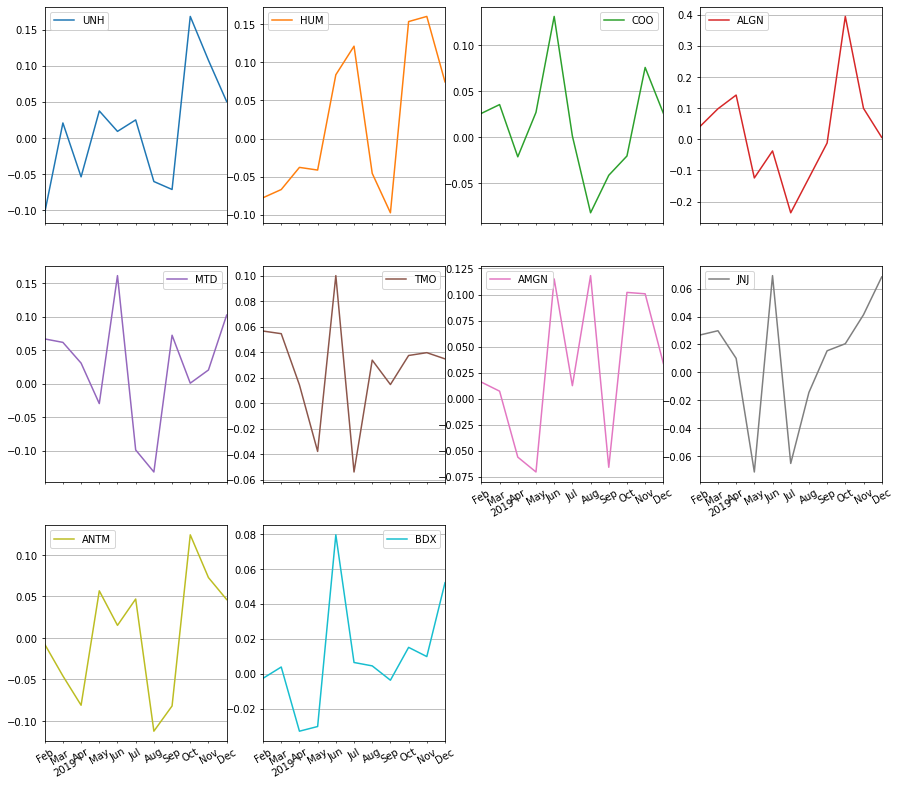

In [ ]:
# the time series of 11 month return for 10 stocks
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

### Portfolio Allocation

#### Summary of the return data

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

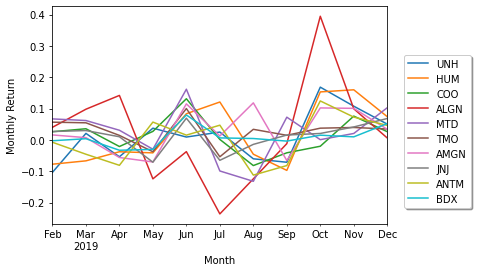

In [ ]:
# see what it looks like... messy... some volatility here!
df = return_data
df.plot()
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.legend(loc='upper center',bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
plt.show() # get rid of funky text

In [ ]:
# calculate mean and sd for each stock
Avg_Return = pd.DataFrame(np.mean(df) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
UNH     0.011794
HUM     0.020470
COO     0.014489
ALGN    0.022369
MTD     0.023345
TMO     0.026744
AMGN    0.028444
JNJ     0.011914
ANTM    0.003083
BDX     0.009205
      Std_Dev_Return
UNH         0.077324
HUM         0.093715
COO         0.055032
ALGN        0.159403
MTD         0.081897
TMO         0.040872
AMGN        0.069323
JNJ         0.044185
ANTM        0.071665
BDX         0.030951


The performance of the ten stocks from Jan 1, 2019 to Jan 1, 2020 is summarized by the means and standard deviations of monthly stock prices, as shown in the
following table:

Stock| Mean| St. Dev.
---|---|---
Unitedhealth Group Inc| 0.011794| 0.077324
Humana Inc| 0.020470|  0.093715
Cooper Companies|  0.014489| 0.055032
Align Technology|  0.022369|  0.159403
Mettler-Toledo International|0.023345| 0.081897
Thermo Fisher Scientific Inc|0.026744| 0.040872
Amgen Inc|0.028444| 0.069323
Johnson & Johnson|0.011914|  0.044185
Anthem Inc|0.003083|  0.071665
Becton Dickinson and Company|0.009205| 0.030951


#### Build the Nonlinear Optimization Model

In [ ]:
# creating covariance table on stock return dataframe
df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
           UNH       HUM       COO  ...       JNJ      ANTM       BDX
UNH   0.006577  0.006463  0.001350  ...  0.000320  0.005091  0.000690
HUM   0.006463  0.009661  0.002188  ...  0.000768  0.005779  0.001569
COO   0.001350  0.002188  0.003331  ...  0.001175  0.001980  0.001052
ALGN  0.006214  0.003695 -0.000028  ...  0.003832  0.003572 -0.000069
MTD  -0.000214 -0.000301  0.003191  ...  0.003154  0.000474  0.001451
TMO  -0.000158  0.000048  0.001067  ...  0.001742 -0.000399  0.000849
AMGN  0.002384  0.004326  0.001004  ...  0.001436  0.001517  0.001537
JNJ   0.000320  0.000768  0.001175  ...  0.002148  0.000023  0.000990
ANTM  0.005091  0.005779  0.001980  ...  0.000023  0.005649  0.000680
BDX   0.000690  0.001569  0.001052  ...  0.000990  0.000680  0.001054

[10 rows x 10 columns]


Average Return:
UNH     0.011794
HUM     0.020470
COO     0.014489
ALGN    0.022369
MTD     0.023345
TMO     0.026744
AMGN    0.028444
JNJ     0.011914
ANTM    0.003083
BDX     0.009205

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (UNH,HUM,COO,ALGN,MTD,TMO,AMGN,JNJ,ANTM,BDX)
m.UNH = Var(within=NonNegativeReals, bounds=(0,1))
m.HUM = Var(within=NonNegativeReals, bounds=(0,1))
m.COO = Var(within=NonNegativeReals, bounds=(0,1))
m.ALGN = Var(within=NonNegativeReals, bounds=(0,1))
m.MTD = Var(within=NonNegativeReals, bounds=(0,1))
m.TMO = Var(within=NonNegativeReals, bounds=(0,1))
m.AMGN = Var(within=NonNegativeReals, bounds=(0,1))
m.JNJ = Var(within=NonNegativeReals, bounds=(0,1))
m.ANTM = Var(within=NonNegativeReals, bounds=(0,1))
m.BDX = Var(within=NonNegativeReals, bounds=(0,1))

# for loop

Now we specify the objective function (maximize your returns - make as much money as possible! Note how we are specifying the fraction/proportion we are investing in each stock multiplied by its average return.

We also specify three constriants.


*   The amount invested in this portfolio needs to sum to '1' or 100%... 
*   The returns need to be greater than 0.015 or 1.5%. This is your 'return floor'.
*   The risk must be below a certain level (your 'risk ceiling'). We will start from 0.001 to 0.003 with a step size of 0.0001 .

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.UNH*df_return[0] + 
                        m.HUM*df_return[1] + 
                        m.COO*df_return[2] +
                        m.ALGN*df_return[3] + 
                        m.MTD*df_return[4] +
                        m.TMO*df_return[5] +
                        m.AMGN*df_return[6] +
                        m.JNJ*df_return[7] +
                        m.ANTM*df_return[8] +
                        m.BDX*df_return[9],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.UNH + m.HUM + m.COO + m.ALGN + m.MTD + m.TMO +
                               m.AMGN + m.JNJ + m.ANTM + m.BDX == 1)

# 2. Minimum return should be 0.015 or 1.5%
m.return_floor = Constraint(expr = m.objective >= 0.015)

In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.0015
max_risk = 0.0015
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.UNH,m.HUM,m.COO,m.ALGN,m.MTD,m.TMO,m.AMGN,m.JNJ,m.ANTM,m.BDX]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# defining risk limits. This is what psioptparam() does.
# risk_limits = [0.001, 0.003] # this is just two options

# this is a sequence of options - better!
risk_limits = np.arange(0.001, 0.0031, 0.0001) # take tiny steps
risk_limits

array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 ])

In [ ]:
# run the model
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [ m.UNH(),m.HUM(),m.COO(),m.ALGN(),m.MTD(),m.TMO(),m.AMGN(),m.JNJ(),m.ANTM(),m.BDX()]
  # store our returns
  returns[r] =  m.UNH()*df_return[0] + m.HUM()*df_return[1] + m.COO()*df_return[2] +m.ALGN()*df_return[3] + m.MTD()*df_return[4] +m.TMO()*df_return[5] +m.AMGN()*df_return[6] +m.JNJ()*df_return[7] +m.ANTM()*df_return[8] +m.BDX()*df_return[9]

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02102494239807129
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
    'p

#### Parameter Analysis

Let's see what the efficient frontier looks like, and the allocation!

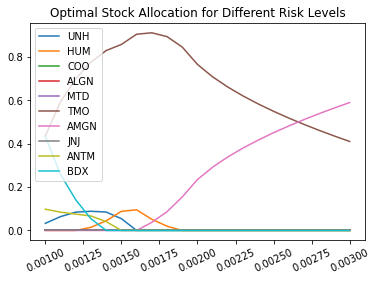

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['UNH','HUM','COO','ALGN','MTD','TMO','AMGN','JNJ','ANTM','BDX']
param_analysis.plot()
plt.xticks(rotation=25)
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

On the lefthand side, we have low risk and high diversity.

On the righthand side, we have high risk and low diversity.

In [ ]:
# output risk and return 
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) 

[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015000000000000002, 0.0016000000000000003, 0.0017000000000000003, 0.0018000000000000004, 0.0019000000000000004, 0.0020000000000000005, 0.0021000000000000003, 0.0022000000000000006, 0.002300000000000001, 0.0024000000000000007, 0.0025000000000000005, 0.0026000000000000007, 0.002700000000000001, 0.002800000000000001, 0.0029000000000000007, 0.003000000000000001]
[0.016318873880806505, 0.01926141616855624, 0.021215392861298452, 0.022801842666367676, 0.02422212147002203, 0.025376915557509764, 0.026145728316994236, 0.0264856567280303, 0.026767291289246438, 0.027006766395039326, 0.027142855501351256, 0.02724032580094442, 0.02732049342816542, 0.027390217166848512, 0.02745275242986272, 0.027509949263758982, 0.027562978570331513, 0.027612637066747756, 0.027659495956431485, 0.02770398130849735, 0.027746420971373267]


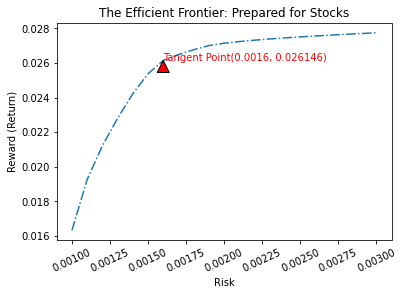

In [ ]:
# plot the efficient frontier
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: Prepared for Stocks')
xlabel('Risk')
ylabel('Reward (Return)')
plt.xticks(rotation=25)
# mark the tangent point risk level = 0.0016
plt.annotate(
'Tangent Point(0.0016, 0.026146)', xy=(0.0016, 0.026146), xytext=(0.0016, 0.026146), color= "r", arrowprops={"facecolor": 'r', "shrink": 0.001}
)
plt.show()

Together with the increase of risk level, the optimal reward for each portofolio go upward. However, reward increases at a lower rate after the tangent point. To balance our risk and reward, we choose the point which risk level equals to 0.016.

In [ ]:
# get the allocation plan when risk level = 0.0016
allocation = pd.DataFrame(param_analysis.iloc[6])
allocation.columns = ['Percentage']
allocation

,Percentage
UNH,5.755756e-07
HUM,9.534984e-02
COO,3.090697e-07
ALGN,1.306267e-07
MTD,3.052733e-07
TMO,9.046462e-01
AMGN,2.076780e-06
JNJ,1.607769e-07
ANTM,2.293516e-07
BDX,2.210740e-07


## **4. Analysis**

Imagine that we invested $1M dollars in our ten stocks on Jan 1, 2020, whether our portofolio could survive in the pandemic?

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['UNH','HUM','COO','ALGN','MTD','TMO','AMGN','JNJ','ANTM','BDX']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/2020',end_date='11/2020',interval='1mo') for ticker in tickers_list}

In [ ]:
# take a peak!
dow_prices

{'ALGN':                   open        high         low  ...    adjclose    volume  ticker
 2020-01-01  281.200012  301.649994  248.350006  ...  257.100006  19759700    ALGN
 2020-02-01  257.500000  277.679993  211.009995  ...  218.350006  16642600    ALGN
 2020-03-01  218.910004  238.679993  127.879997  ...  173.949997  31544400    ALGN
 2020-04-01  164.089996  227.440002  150.380005  ...  214.850006  28811700    ALGN
 2020-05-01  208.080002  255.649994  195.559998  ...  245.619995  22940000    ALGN
 2020-06-01  247.339996  292.040009  237.240005  ...  274.440002  22284400    ALGN
 2020-07-01  275.950012  326.359985  267.630005  ...  293.820007  19175700    ALGN
 2020-08-01  296.010010  316.279999  279.829987  ...  296.980011  11957800    ALGN
 2020-09-01  297.100006  340.290009  293.329987  ...  327.359985  14914900    ALGN
 2020-10-01  333.640015  475.369995  310.029999  ...  426.079987  20595900    ALGN
 
 [10 rows x 7 columns],
 'AMGN':                   open        high         l

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the UNH (one sample)
prep_data = pd.DataFrame(dow_prices['UNH']['adjclose']).rename(columns = {"adjclose":"UNH"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,UNH,HUM,COO,ALGN,MTD,TMO,AMGN,JNJ,ANTM,BDX
2020-01-01,269.003143,334.449432,346.825317,257.100006,757.179993,312.583435,211.667007,145.937027,262.524414,272.452942
2020-02-01,251.734406,317.977631,324.536621,218.350006,701.700012,290.236786,195.678085,131.830536,254.419495,235.463196
2020-03-01,246.225006,312.347778,275.641663,173.949997,690.510010,283.050751,200.027115,129.366241,224.681625,227.492966
2020-04-01,290.020691,380.587433,286.670532,214.850006,719.940002,334.290497,236.030624,148.021881,278.847870,250.856171
2020-05-01,302.296997,409.324341,316.947388,245.619995,795.000000,348.783600,226.637543,146.749237,292.138153,245.293289
2020-06-01,292.479950,386.498291,283.610840,274.440002,805.549988,361.918274,234.290604,139.700195,261.216858,237.684067
2020-07-01,301.537476,391.836823,282.900879,293.820007,935.000000,413.738770,243.041992,144.796280,272.826569,280.390503
2020-08-01,311.267365,414.521332,314.380005,296.980011,970.780029,428.761108,251.634445,152.395706,280.519104,241.950668
2020-09-01,310.490570,413.243317,337.119995,327.359985,965.750000,441.294678,254.160004,148.880005,267.635101,231.894714
2020-10-01,305.140015,399.279999,319.049988,426.079987,997.909973,473.119995,216.940002,137.110001,272.799988,231.130005


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,UNH,HUM,COO,ALGN,MTD,TMO,AMGN,JNJ,ANTM,BDX
2020-02-01,-0.064195,-0.049250,-0.064265,-0.150720,-0.073272,-0.071490,-0.075538,-0.096661,-0.030873,-0.135766
2020-03-01,-0.021886,-0.017705,-0.150661,-0.203343,-0.015947,-0.024759,0.022225,-0.018693,-0.116885,-0.033849
2020-04-01,0.177869,0.218473,0.040012,0.235125,0.042621,0.181027,0.179993,0.144208,0.241080,0.102699
2020-05-01,0.042329,0.075507,0.105616,0.143216,0.104259,0.043355,-0.039796,-0.008598,0.047661,-0.022176
2020-06-01,-0.032475,-0.055765,-0.105180,0.117336,0.013270,0.037659,0.033768,-0.048035,-0.105845,-0.031021
2020-07-01,0.030968,0.013813,-0.002503,0.070617,0.160698,0.143183,0.037353,0.036479,0.044445,0.179677
2020-08-01,0.032268,0.057893,0.111273,0.010755,0.038267,0.036309,0.035354,0.052484,0.028196,-0.137094
2020-09-01,-0.002496,-0.003083,0.072333,0.102296,-0.005181,0.029232,0.010037,-0.023070,-0.045929,-0.041562
2020-10-01,-0.017233,-0.033790,-0.053601,0.301564,0.033301,0.072118,-0.146443,-0.079057,0.019298,-0.003298


In [ ]:
from pandas import Series
pd.set_option('display.float_format',lambda x : '%.2f' % x) # disable Scientific notation for python

# create our prinpal for investment
principal = 1000000
Months = ['Principal', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', 
          '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01']

# create a dataframe to store our portfolio changes
portfolio = pd.DataFrame()
# our portfolio allocation equals the principal times the optimal result from pyomo
portfolio['Principal'] = principal*allocation['Percentage']
for i in arange(1,10):
  portfolio[i] = portfolio.iloc[:,i-1]*(1+return_data.T.iloc[:,i-1])

# sum up all the investment for each month
sum_up = portfolio.agg(['sum'],axis=0)
# append the sum up to our dataframe
portfolio = portfolio.append(sum_up)
portfolio = portfolio.T
# reset the index to exact months
portfolio.index = Series(Months)
# Let's see our portfolio performance!
portfolio

,UNH,HUM,COO,ALGN,MTD,TMO,AMGN,JNJ,ANTM,BDX,sum
Principal,0.58,95349.84,0.31,0.13,0.31,904646.15,2.08,0.16,0.23,0.22,1000000.00
2020-02-01,0.54,90653.81,0.29,0.11,0.28,839972.83,1.92,0.15,0.22,0.19,930630.34
2020-03-01,0.53,89048.77,0.25,0.09,0.28,819175.76,1.96,0.14,0.20,0.18,908228.15
2020-04-01,0.62,108503.55,0.26,0.11,0.29,967468.45,2.32,0.16,0.24,0.20,1075976.20
2020-05-01,0.65,116696.29,0.28,0.12,0.32,1009412.87,2.22,0.16,0.26,0.20,1126113.38
2020-06-01,0.63,110188.70,0.25,0.14,0.32,1047425.86,2.30,0.15,0.23,0.19,1157618.78
2020-07-01,0.65,111710.69,0.25,0.15,0.38,1197399.30,2.38,0.16,0.24,0.23,1309114.43
2020-08-01,0.67,118177.93,0.28,0.15,0.39,1240875.38,2.47,0.17,0.25,0.20,1359057.87
2020-09-01,0.66,117813.57,0.30,0.17,0.39,1277148.72,2.49,0.16,0.23,0.19,1394966.89
2020-10-01,0.65,113832.70,0.28,0.22,0.40,1369254.21,2.13,0.15,0.24,0.19,1483091.17


The dataframe above shows the monthly performance of our portfolio. The 'Principal' row is the initial investment of $1M. The 'sum' column calculated the summation for our assets each month. 

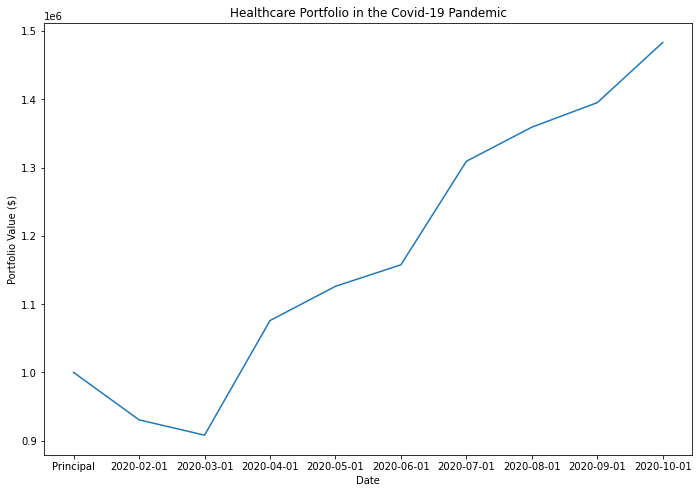

In [ ]:
Portfolio_sum = portfolio['sum']
# Plot the portfolios cumulative returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,1.5,1.5])
ax1.plot(Portfolio_sum)
ax1.set_xlabel('Date')
ax1.set_ylabel("Portfolio Value ($)")
ax1.set_title("Healthcare Portfolio in the Covid-19 Pandemic")
plt.show()

We can see from the line chart that as the pandemic spreading, there's a significant drop down for our portfolio around March. But it then bounced up after March due to our Healthcare industry property. It is still growing at current stage. 

Until 10/2020, we could get $1483091.17

## **5. Conclusion**

1). Based on company financial performance, we selected 10 stocks. Choosing a single standard like EPS is not convictive. We chose earned per share, 3M% change (change rate for three months), P/E ratio (share price/earnings per share), market cap as indicators of fundamental analysis to pick the top ten stocks. 

2). When comparing the stocks, we thought about the profit, stock price, market capital and growth potential of companies during 2019. That’s why we drew five separate plots to compare EPS, P/E, Market Cap with 3M % change, and Market Cap and P/E. Our strategy was 6 conservative and stable stocks with low P/E and 4 stocks with high P/E and high profit. In the further study, we can choose stock with different risk levels. 

3). After selecting the ten stocks for portfolio, we set the goal to maximize the return while taking the potential risk into consideration. Average return can help us to see which stock earns more money back, and standard deviation help us to know which stock is risky (the return is not stable). These two determined the risk we would bear.

4). Our return floor was 0.015 (1.5%). Because we did not define the period of our investment, we should think about the inflation next time. In other words, our return rate should be higher than the inflation rate, otherwise our money has less value.

5). We used the results of the nonlinear optimization model to see the change of stocks proportion for different risk levels, and we found that on the left-hand side, our stocks were diverse with the low risk. After the risk raised to 0.0175, we only left two or three stocks and gave up the diversity. 

6). In this project, we only cared about the proportion of stock when risk changed, we did not make a portfolio of mixed risks. Our efficient Frontier showed that, on the tangent point, we got 2.6% reward with 0.16% risk. The reward swiftly went up when risk changed from 0.1% to 0.15% and then smoothly increased. In the next step, we can set constraints like this: 40% of stocks with low risk, 30% of the stocks with moderate exposure and 30% of the stocks with high risk.

7). By using the model and the specific risk level, we predicted the price and numbers of shares for each stock. Stock market churned through a weak session during the cov-19 pandemic. Health care stocks were no exception. 

8). We predicted that the accumulated reward of our portfolio would go down on Feb and March but rapidly go up on April. Absolutely we would earn money, but the most profit come from Humana Inc and Thermo Fisher Scientific Inc.



Group Member Contribution

Data Preprocessing / EDA / Stock Selection: All Members

Modeling: Simeng Deng and Yingxiao Zhu

Analysis: Zihao Yan and Shuyao Chen

Conclusion/Video: Ce Zhuang

## **6. References**

1. How to Invest in Healthcare Stocks: https://investorjunkie.com/investing/how-to-invest-in-healthcare-stocks/

2. Technical Analysis vs. Fundamental Analysis: https://investorjunkie.com/investing/what-is-technical-analysis-vs-fundamental-analysis/

Feedback: Healthcare data. I thought the EDA was only OK - just scatterplots (so 5 points off here). But what I did like was your use of plotly express, so everything looked very nice. I like your motivation for the ten stocks you ended up choosing, very thoughtful. Nice comments updated for the project in the modeling section. WOAH! You guys made a lot of money by using an optimally allocated portfolio for healthcare (40%!) using the tangent point where you deal with the trade-off between risk and reward - in this case, you reaped the reward. 